# College Admission Classification Labwork

Import Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Using pandas, load "College Admission Train Data.csv"

In [2]:
df=pd.read_csv("College Admission Train Data.csv") # importer les données des notes et des décisions

---

In this section, we will ignore the previous jury decision.


Plot the dataset using scores only :

Text(0, 0.5, 'Exam 2 Score')

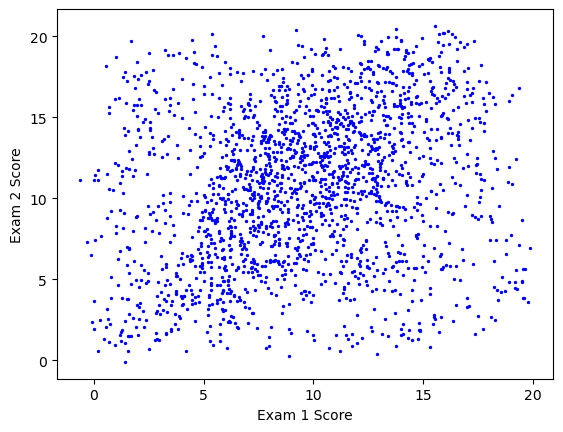

In [3]:
x=df['Exam1'].values # extraire les notes de l'examen 1
y=df['Exam2'].values # extraire les notes de l'examen 2
plt.scatter(x, y, color='blue',s=2)  # tracer les notes des deux examens
plt.xlabel('Exam 1 Score') 
plt.ylabel('Exam 2 Score') 


Compute the decision for each student (admitted if mean > 10) and store it in an array named decision:

In [4]:
decision=[True if (x+y)/2>=10 else False  for x,y in zip(x,y)] # zip combine les deux listes x et y
print(decision)

[True, True, True, True, False, False, False, True, True, True, True, False, True, True, False, True, True, False, False, False, False, False, False, True, True, True, True, True, False, True, False, True, False, True, False, False, False, False, False, True, False, True, False, True, True, True, True, False, True, False, False, True, True, True, True, True, True, True, False, False, False, True, True, True, True, False, True, False, True, True, True, False, True, False, True, True, True, False, True, True, False, False, True, False, False, True, False, False, False, True, False, True, False, False, False, False, True, True, False, False, True, False, False, False, False, False, False, True, True, True, False, False, False, False, True, False, False, False, False, False, False, False, True, True, True, True, False, True, True, False, False, True, False, True, False, False, False, False, False, True, False, False, False, True, False, False, False, True, True, False, False, False, False,

Plot the dataset using decision as color :

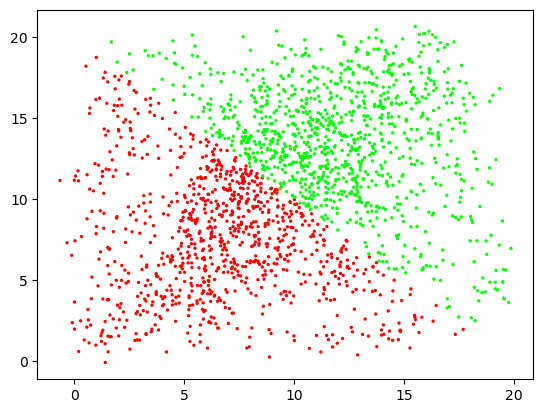

In [5]:
# affichage des decisions vertes (admis) et rouges (non admis)
colors = ['lime' if d else 'red' for d in decision]
plt.scatter(x,y,c=colors,s=2)

In [6]:
def plot_decision_boundary(input_data, decision, x_min=0, x_max=20, y_min=0, y_max=20, plot_step=0.05):
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = (xx.ravel() + yy.ravel()) / 2 > 10
    Z = Z.reshape(xx.shape)
    cs = plt.pcolormesh(xx, yy, Z, cmap="Pastel1")
    plt.axis([x_min, x_max, y_min, y_max])
    plt.scatter(input_data['Exam1'], input_data['Exam2'], s=2, c=decision, cmap="prism")
    plt.show()

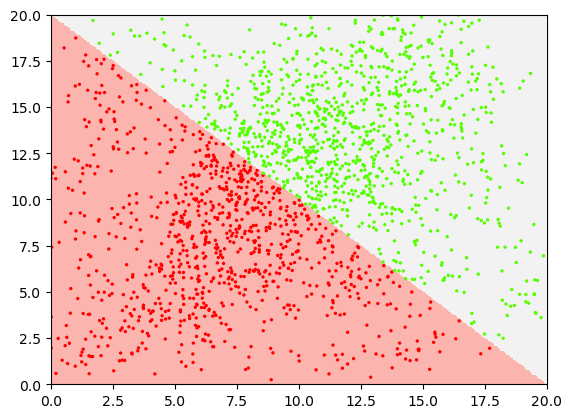

In [7]:
plot_decision_boundary(df, decision)

Plot the dicision boundaries and the data points (Apply class color from the dataset decision) :

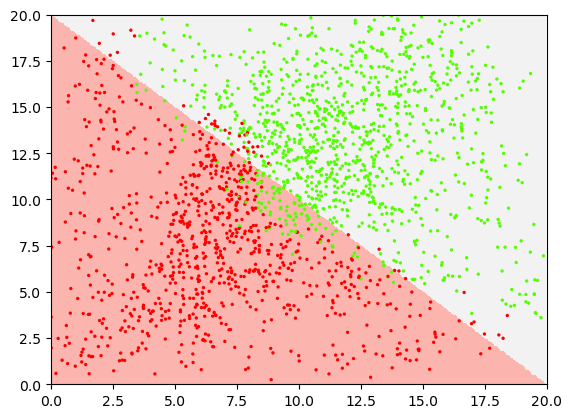

In [ ]:
# on utilise la decision du jury cette fois ci
dec_jury=[True if x==1 else False  for x in df["Decision"]]
plot_decision_boundary(df, dec_jury)

What is the algorithm decision accuracy related to the jury decision ??

In [9]:
#Calcul le nombre de point bien placé c'est a dire point rouge dans la zone rouge et point vert en dehors de la zone rouge
mean=(df['Exam1'].values+df['Exam2'].values)/2
correct = ((mean >= 10) & (df['Decision'] == 1)) | ((mean < 10) & (df['Decision'] == 0))
accuracy=correct.sum()
print(accuracy/len(df))

0.9295


# Linear Discriminant Analysis

Create and fit the model

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model=LinearDiscriminantAnalysis() 
X=df[['Exam1','Exam2']].values
Y=df['Decision'].values

model.fit(X,Y)

# LDA : Permet de trouver une combinaison linéaire qui sépare au mieux les décisions admis ou non

,solver,'svd'
,shrinkage,None
,priors,None
,n_components,None
,store_covariance,False
,tol,0.0001
,covariance_estimator,None


Display the data and the decision boundaries 

In [11]:
def plot_model_decision_boundary(model, input_data, x_min=0, x_max=20, y_min=0, y_max=20, plot_step=0.1):
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.pcolormesh(xx, yy, Z, cmap="Pastel1")
    plt.axis([x_min, x_max, y_min, y_max])
    plt.scatter(input_data['Exam1'], input_data['Exam2'], s=2, c=input_data['Decision'], cmap="prism")
    plt.show()

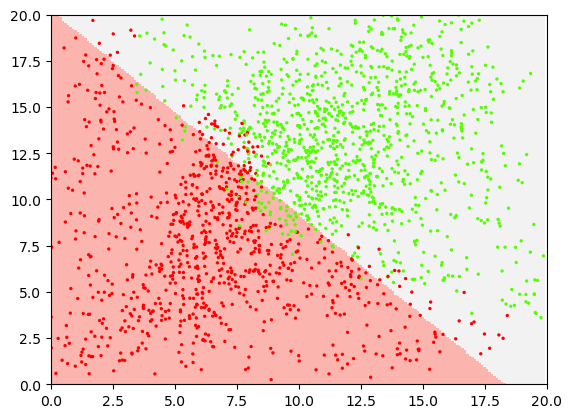

In [12]:
plot_model_decision_boundary(model, df)

Measure the accuracy of your model

In [13]:
from sklearn.metrics import accuracy_score
Y_pred = model.predict(X) #Y_pred aux décisions prédites par le modèle
print(accuracy_score(Y, Y_pred)) # Y correspond aux vraies décisions du jury 
# accuracy_score compare les deux listes et calcule le pourcentage de bonnes réponses

0.937


# Quadratic Discriminant Analysis

In [14]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model2 = QuadraticDiscriminantAnalysis()
model2.fit(X, Y)

#QDA: Cette algorithme va permettre d'avoir une combinaison du second degré avec une parabole au lieu d'un axe lineaire

,priors,None
,reg_param,0.0
,store_covariance,False
,tol,0.0001


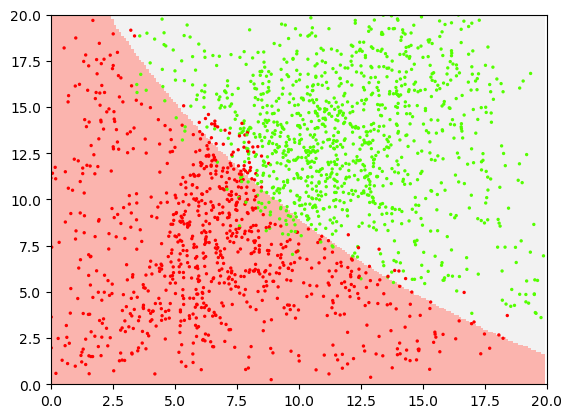

In [15]:
plot_model_decision_boundary(model2, df)

In [16]:
Y_pred = model2.predict(X) 
print(accuracy_score(Y, Y_pred)) 
# Mieux que la Linear Discriminant Analysis

0.9445


---
# Decisision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(max_depth=4)
model3.fit(X, Y)

#DTC: Le but est de diviser les données en sous ensemble ce qui ressemble 
# a un arbre avec pleins de sous ensemble quand il y a beaucoup de données

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


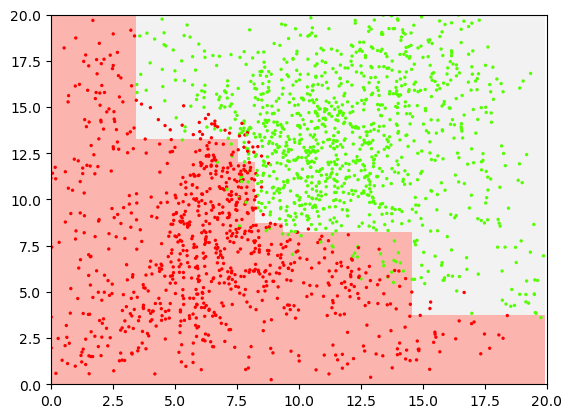

In [18]:
plot_model_decision_boundary(model3, df)

In [19]:
Y_pred = model3.predict(X)
print(accuracy_score(Y, Y_pred)) 
# Meilleure que les deux précédentes

0.959


---

# Create a K-Nearest Neighbors Classifier (KNN)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier()
model4.fit(X, Y)

#KNN: Correspond à l'algorithme des k plus proches voisins il va classer un point
# en fonction de ses voisins et prendre celui qui est majoritairement présent 
#ici la fonction a un n_neighbors = 5 par default

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


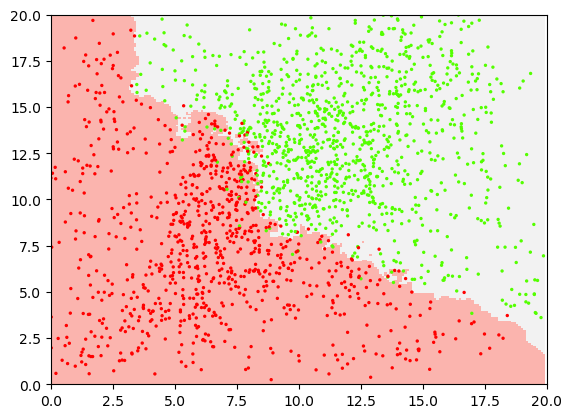

In [21]:
plot_model_decision_boundary(model4, df)

In [22]:
Y_pred = model4.predict(X) 
print(accuracy_score(Y, Y_pred)) 
# Encore mieux que l'arbre de décision

0.9655


# Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier(n_estimators=500, max_depth=3)
model5.fit(X, Y)

# RDC: Contient plusieurs paramètre permettant d'améliorer le modèle
# n_estimators:Correspond aux nombres d'arbres améliore la precision 
#max_depth: Profondeur maximale des arbres attention au surapprentissage


,n_estimators,500
,criterion,'gini'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


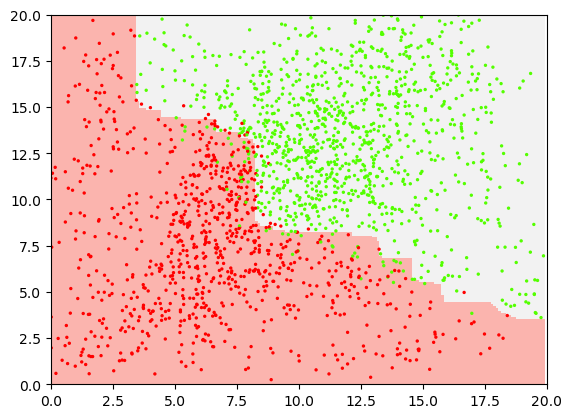

In [24]:
plot_model_decision_boundary(model5, df)

In [25]:
Y_pred = model5.predict(X) 
print(accuracy_score(Y, Y_pred))

0.9635


---

Load 'College Admission Test Data.csv'

In [26]:
test=pd.read_csv("College Admission Test Data.csv")

Compute and print the accuracy of all models on test data

In [27]:
Ex=test[['Exam1','Exam2']].values
D=test['Decision'].values
print ("Accuracy on test data:")

model.fit(Ex,D)
predict1=model.predict(Ex)
print("LDA model accuracy:",accuracy_score(D, predict1))

model2.fit(Ex,D)
predict2=model2.predict(Ex)
print("QDA model accuracy:",accuracy_score(D, predict2))

model3.fit(Ex,D)
predict3=model3.predict(Ex)
print("DTC model accuracy:",accuracy_score(D, predict3))

model4.fit(Ex,D)
predict4=model4.predict(Ex)
print("KNN model accuracy:",accuracy_score(D, predict4))

model5.fit(Ex,D)
predict5=model5.predict(Ex)
print("RFC model accuracy:",accuracy_score(D, predict5))


Accuracy on test data:
LDA model accuracy: 0.934
QDA model accuracy: 0.953
DTC model accuracy: 0.961
KNN model accuracy: 0.967
RFC model accuracy: 0.969
